# Gill's model results: 

Plot Q1 in terms of w and h (tranangular and parobola)

In [1]:
# %matplotlib notebook
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.io as sio
import matplotlib.pyplot as plt

# Rectangular Sill Case:

We specify the best guesses for Samoan Passage (8$^\circ$S) and certainly can be updated.

We specify reduced gravity ($g'=4\times10^{-4}$); PV ($q=-D/D_\infty=-1$).

We assume the upstream depth equals typical depth within the passage ($D=D_\infty$=1000 m).

Geometry within the Samoan Passage: width ($w_s$=50 or 20 km); bottom elevation ($h_s$=600 m).


In [2]:
# Compute scales for nondimensional variables
r = 6.371e+6
unit = 2*np.pi*r/360
Omega = 7.292e-5
g = 4e-4
Di = 1000
lat = -8
q = -1
f0 = abs(2*Omega*np.sin(lat/180*np.pi))
Ld = np.sqrt(g*Di)/f0
D = -q*Di

# Best guesses of Samoan Passage
wsd = np.array([50e+3, 20e+3])
hsd = np.array([600, 400])

# nondimensionalize
wsn = wsd/Ld
hsn = hsd/Di

## Rectangular for the (w,h) plane

In [3]:
# load Gill's model outputs from a .mat dataset, data generated from matlab code: ../data/Gill_rectangular.m 
data_path = '../data/'
data_name = 'Gill_rectangular.mat'
data = sio.loadmat(data_path + data_name,squeeze_me = True,struct_as_record = False)
type(data)
dict.keys(data)

dict_keys(['__header__', '__version__', '__globals__', 'Q', 'Q1', 'Q1_', 'Q1_new', 'best', 'd1c', 'd1f', 'd_bar_', 'h1c', 'h_level', 'q', 'v1c', 'v1f', 'w1c', 'we_', 'we_level'])

In [4]:
# Only pick out Q1 with q=-1 and Q=0.5
Q1 = data['Q1'] ; q = data['q'] ; Q = data['Q'] ; w1c = data['w1c'] ; h1c = data['h1c']
d1c = data['d1c'] ; d1f = data['d1f']
Q1.shape
type(Q1)

# consider separation
Q1_new = data['Q1_new']
we_level = data['we_level']
h_level = data['h_level']
del data

idx = np.stack((np.squeeze(np.argwhere(q==-1),axis=0), np.squeeze(np.argwhere(Q==0.5),axis=0)), axis=-1)
print('pick out Q1 with q=', q[idx[0,0]], ' Q=', Q[idx[0,1]])#*list(q[idx[0,1]]))
Q1 = np.squeeze(Q1[idx[0,0],:,idx[0,1],:])
Q1 = Q1.transpose()
dr = np.squeeze(d1c[idx[0,0],:,idx[0,1],:]) + np.squeeze(d1f[idx[0,0],:,idx[0,1],:])
dr = dr.transpose()

pick out Q1 with q= -1.0  Q= 0.5


In [5]:
# Fill the abnormal Q1 with nan
# notice here we relax the threshold for a bit for a prettier plot
Q1[Q1.real>0.52] = np.nan
# Q1[abs(Q1.imag)>0.02] = np.nan

/Users/tantanmeow/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2795: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


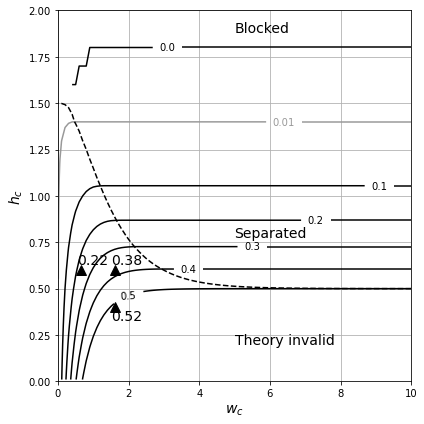

In [6]:
# consider separationn
dQ = np.arange(0, Q[idx[0,1]] + 1e-6, Q[idx[0,1]]/5) 

fig, ax = plt.subplots(figsize=(6,6))
h = ax.contour(w1c, h1c, Q1_new.T, levels=dQ, colors='k')
plt.clabel(h, fmt='%1.1f')
# ax.contourf(w1c, h1c, Q1_new.T, levels=np.array([0,.5]), colors='.6',vmin=0.1,vmax=0.5)

# # plot boundaries of Q1 that actually make sense : [0+0.05,0.5-0.05]
h1 = ax.contour(w1c, h1c, Q1_new.T, [Q[idx[0,1]]/100], colors='0.6')
plt.clabel(h1, fmt='%1.2f')

# right of the dash line, the flow thickness at the right-hand wall and the flow speed at theleft-hand wall are both negative
ax.contour(w1c, h1c, dr.real, [0.0], colors='k', linestyles='dashed')

# separation point
# ax.scatter(we_level, h_level, marker='s', c='k')

# for Q1> upper limit, "Blocked" ; for Q1< lower limit, 'Separated or Uncontrolled'
plt.text(5, 1.88, 'Blocked', fontsize=14, color='k')
plt.text(5, 0.78, 'Separated', fontsize=14, color='k')
plt.text(5, 0.2, 'Theory invalid', fontsize=14, color='k')

# mark the three results: w1c=20km, b1c=600m; w1c=50km, b1c=600m; w1c=50km, b1c=400m
ax.plot(wsn[0], hsn[0], marker='^', color='k', markersize=10)
ax.plot(wsn[1], hsn[0], marker='^', color='k', markersize=10)
ax.plot(wsn[0], hsn[1], marker='^', color='k', markersize=10)

plt.text(wsn[0]-0.1, hsn[0]+0.03, 
         np.round(np.squeeze(Q1[np.squeeze(np.argwhere(h1c==hsn[0]),axis=0),
                                np.squeeze(np.argwhere(w1c==round(wsn[0],2)),axis=0)]).real,2), 
         fontsize=14, color='k')
plt.text(wsn[1]-0.1, hsn[0]+0.03, 
         np.round(np.squeeze(Q1[np.squeeze(np.argwhere(h1c==hsn[0]),axis=0),
                                np.squeeze(np.argwhere(w1c==round(wsn[1],1)),axis=0)]).real,2), 
         fontsize=14, color='k')
plt.text(wsn[0]-0.1, hsn[1]-0.07, 
         np.round(np.squeeze(Q1[np.squeeze(np.argwhere(h1c==hsn[1]),axis=0),
                                np.squeeze(np.argwhere(w1c==round(wsn[0],1)),axis=0)]).real,2), 
         fontsize=14, color='k')
ax.set(xlim=(0,10))
ax.set(ylim=(0,2))
ax.set_ylabel('$h_c$', fontsize=14)
ax.set_xlabel('$w_c$', fontsize=14)
ax.set_title('')
plt.tight_layout()
ax.grid() # plt.grid(True)

plt.savefig('../pics/Fig3_before_modify.eps')
